In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
header_list = ["userId", "productId", "Rating", "timestamp"]
df = pd.read_csv("E:\\backup\\OneDrive\\Desktop\\Data Science\\Project\\Recommendation\\ratings.csv", names=header_list)

In [4]:
df

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [5]:
df=df.drop('timestamp',axis=1)

In [6]:
df.drop_duplicates()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824478,A322MDK0M89RHN,BT008UKTMW,5.0
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [8]:
data=df.productId.unique()
data=pd.DataFrame(data)
data

,0
0,0132793040
1,0321732944
2,0439886341
3,0511189877
4,0528881469
...,...
475997,BT008G3W52
475998,BT008SXQ4C
475999,BT008T2BGK
476000,BT008UKTMW


In [9]:
df.productId.unique().shape

(476002,)

In [10]:
df.shape

(7824482, 3)

In [11]:
df.isnull().any()

userId       False
productId    False
Rating       False
dtype: bool

In [12]:
df1=df.iloc[:1000000,]

In [13]:
df1

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
999995,A2OC5SYI7THCR6,B000HDU0Q4,5.0
999996,ALWL0AJ94O8RJ,B000HDU0Q4,5.0
999997,A1XTY9T4FYKT7S,B000HDU0Q4,4.0
999998,AC4IGGPO6HY0M,B000HDU0Q4,2.0


In [14]:
df1.describe()['Rating'].T

count    1000000.000000
mean           3.973620
std            1.399741
min            1.000000
25%            3.000000
50%            5.000000
75%            5.000000
max            5.000000
Name: Rating, dtype: float64

E:\softwares\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


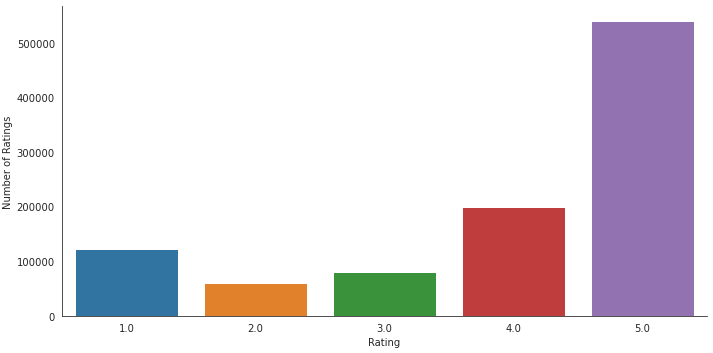

In [15]:
with sns.axes_style('white'):
    rate = sns.factorplot("Rating", data=df1, aspect=2.0,kind='count')
    rate.set_ylabels("Number of Ratings")

In [16]:
print("Total Data")

print("Total No of Ratings :",df1.shape[0])
print("Total No of Users :",len(np.unique(df1.userId)))
print("Total No of Products :",len(np.unique(df1.productId)))

Total Data
Total No of Ratings : 1000000
Total No of Users : 754153
Total No of Products : 59634


In [17]:
No_of_Rated_Products_per_User = df1.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
No_of_Rated_Products_per_User

userId
A5JLAU2ARJ0BO     409
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      138
AT6CZDCP4TRGA     125
                 ... 
A2DKIW4WMCXCC7      1
A2DKJTBLJ47Y0M      1
A2DKJW3JKVYEDB      1
A2DKJWEQ7D6FM7      1
AZZZOVIBXHGDR       1
Name: Rating, Length: 754153, dtype: int64

In [18]:
No_of_Rated_Products_per_User.describe()

count    754153.000000
mean          1.325991
std           1.372250
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         409.000000
Name: Rating, dtype: float64

In [19]:
print(' No of Rated Product More than 50 per User : {}'.format(sum(No_of_Rated_Products_per_User >= 50)))

 No of Rated Product More than 50 per User : 37


In [20]:
df2=df1.groupby("productId").filter(lambda x:x['Rating'].count() >=50)

In [21]:
df2.groupby('productId')['Rating'].mean()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
                ...   
B000HDMUU8    4.543860
B000HDONV2    4.507042
B000HDONWQ    3.981818
B000HDQ2G6    4.408805
B000HDU0Q4    4.408451
Name: Rating, Length: 3639, dtype: float64

In [22]:
df2.groupby('productId')['Rating'].mean().sort_values(ascending=False)

productId
B0000DYV9H    4.947368
B000053HC5    4.945783
B00009R96C    4.885714
B00005LE76    4.879310
B0002E52S4    4.861111
                ...   
B00093040Y    1.568627
B0002325XK    1.531250
B00020QJC6    1.500000
B000C4ATGY    1.360000
B00024L6P2    1.203704
Name: Rating, Length: 3639, dtype: float64

In [23]:
df2.groupby('productId')['Rating'].count().sort_values(ascending=False)

productId
B0002L5R78    9487
B0001FTVEK    5345
B000BQ7GW8    4275
B00007E7JU    3523
B000BKJZ9Q    3219
              ... 
B00008JOMD      50
B00020E4QO      50
B0000CG4DI      50
B0006ZO2CG      50
B000FOI2TW      50
Name: Rating, Length: 3639, dtype: int64

In [24]:
Ratings_values = pd.DataFrame(df2.groupby('productId')['Rating'].mean())

In [25]:
Ratings_values['Count'] = pd.DataFrame(df2.groupby('productId')['Rating'].count())

In [26]:
Ratings_values

,Rating,Count
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171
...,...,...
B000HDMUU8,4.543860,57
B000HDONV2,4.507042,71
B000HDONWQ,3.981818,55


Text(0, 0.5, 'Values')

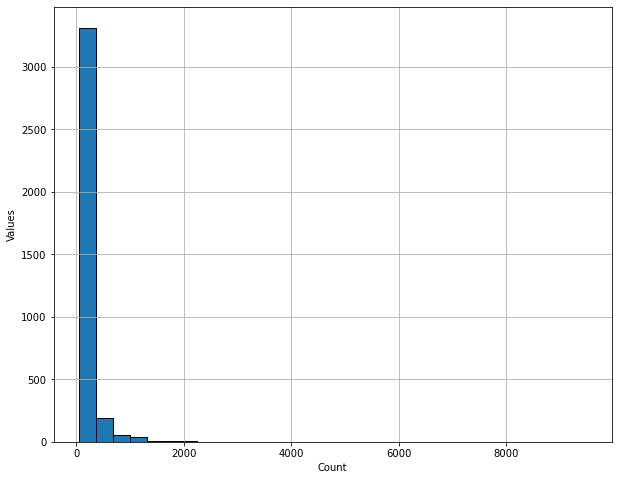

In [27]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
hist_count=Ratings_values['Count'].hist(bins=30)
hist_count.set_xlabel('Count')
hist_count.set_ylabel('Values')

Text(0, 0.5, 'Values')

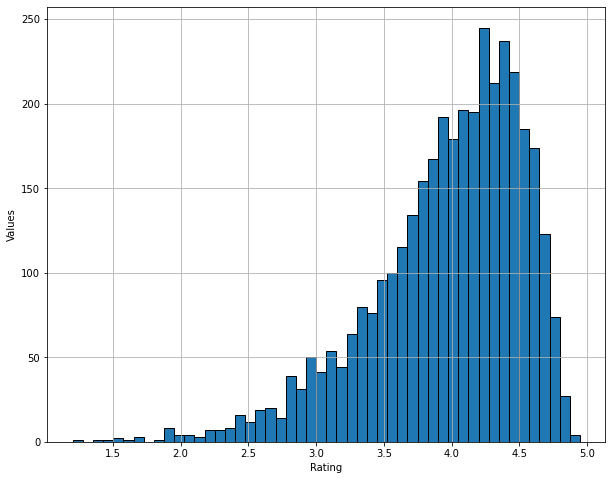

In [28]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
hist_rating=Ratings_values['Rating'].hist(bins=50)
hist_rating.set_xlabel('Rating')
hist_rating.set_ylabel('Values')

<Figure size 720x576 with 0 Axes>

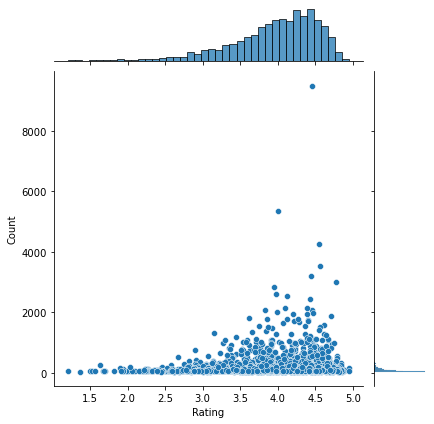

In [29]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating',y='Count', data=Ratings_values)

In [19]:
df3=df.groupby("userId").filter(lambda x:x['Rating'].count() >=50)

In [20]:
df3

,userId,productId,Rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0


In [33]:
df4=df3.groupby("productId").filter(lambda x:x['Rating'].count() >=25)

In [34]:
df4

,userId,productId,Rating
72043,A2YRX8J4WM5BRX,B00004ZCJE,5.0
72059,AU627A4UGIW6V,B00004ZCJE,5.0
72077,A16RL0RMRF974O,B00004ZCJE,5.0
72121,AR8LWDT6TUKNZ,B00004ZCJE,5.0
72122,AD9ZL63H0VKCZ,B00004ZCJE,5.0
...,...,...,...
7820340,AIJQU979J6UFY,B00K91DB7Y,4.0
7820346,ALDAF4VVLFRHP,B00K91DB7Y,4.0
7820356,A1BT6TL7UCIC5Y,B00K91DB7Y,5.0
7820367,A3M7BCQKSQAK4L,B00K91DB7Y,5.0


In [35]:
df4['link']='https://www.amazon.com/dp/'+df['productId']

In [36]:
df4

,userId,productId,Rating,link
72043,A2YRX8J4WM5BRX,B00004ZCJE,5.0,https://www.amazon.com/dp/B00004ZCJE
72059,AU627A4UGIW6V,B00004ZCJE,5.0,https://www.amazon.com/dp/B00004ZCJE
72077,A16RL0RMRF974O,B00004ZCJE,5.0,https://www.amazon.com/dp/B00004ZCJE
72121,AR8LWDT6TUKNZ,B00004ZCJE,5.0,https://www.amazon.com/dp/B00004ZCJE
72122,AD9ZL63H0VKCZ,B00004ZCJE,5.0,https://www.amazon.com/dp/B00004ZCJE
...,...,...,...,...
7820340,AIJQU979J6UFY,B00K91DB7Y,4.0,https://www.amazon.com/dp/B00K91DB7Y
7820346,ALDAF4VVLFRHP,B00K91DB7Y,4.0,https://www.amazon.com/dp/B00K91DB7Y
7820356,A1BT6TL7UCIC5Y,B00K91DB7Y,5.0,https://www.amazon.com/dp/B00K91DB7Y
7820367,A3M7BCQKSQAK4L,B00K91DB7Y,5.0,https://www.amazon.com/dp/B00K91DB7Y


In [37]:
df4.loc[:,'link']

72043      https://www.amazon.com/dp/B00004ZCJE
72059      https://www.amazon.com/dp/B00004ZCJE
72077      https://www.amazon.com/dp/B00004ZCJE
72121      https://www.amazon.com/dp/B00004ZCJE
72122      https://www.amazon.com/dp/B00004ZCJE
                           ...                 
7820340    https://www.amazon.com/dp/B00K91DB7Y
7820346    https://www.amazon.com/dp/B00K91DB7Y
7820356    https://www.amazon.com/dp/B00K91DB7Y
7820367    https://www.amazon.com/dp/B00K91DB7Y
7820385    https://www.amazon.com/dp/B00K91DB7Y
Name: link, Length: 16666, dtype: object

In [38]:
final_data=df4

In [39]:
pt=final_data.pivot_table(index='productId',columns='userId',values='Rating')
pt.fillna(0, inplace=True)
pt

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
B00004ZCJE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005LEN4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005T3G0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
B000067RT6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00006B7DA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00IX2VGFA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00JC5Y6WM,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00JF0D7RE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
similarity_score_c=cosine_similarity(pt)

In [45]:
similarity_score_c

array([[1.        , 0.10415475, 0.10691223, ..., 0.04328465, 0.04724751,
        0.03932177],
       [0.10415475, 1.        , 0.        , ..., 0.        , 0.02599587,
        0.        ],
       [0.10691223, 0.        , 1.        , ..., 0.03692452, 0.        ,
        0.03438254],
       ...,
       [0.04328465, 0.        , 0.03692452, ..., 1.        , 0.03762734,
        0.        ],
       [0.04724751, 0.02599587, 0.        , ..., 0.03762734, 1.        ,
        0.11887544],
       [0.03932177, 0.        , 0.03438254, ..., 0.        , 0.11887544,
        1.        ]])

In [46]:
similarity_score_c[0]

array([1.        , 0.10415475, 0.10691223, 0.        , 0.02000882,
       0.12389983, 0.05120318, 0.17230713, 0.10318487, 0.        ,
       0.02886359, 0.06723242, 0.12512153, 0.09699887, 0.        ,
       0.0290774 , 0.07425777, 0.03322753, 0.01618668, 0.03845398,
       0.        , 0.0282494 , 0.07818422, 0.1298499 , 0.07612228,
       0.04015559, 0.04682067, 0.04247913, 0.04516508, 0.04822782,
       0.05867823, 0.        , 0.05020591, 0.08693256, 0.14586761,
       0.02905041, 0.06993671, 0.        , 0.02266136, 0.07236586,
       0.05048117, 0.03656047, 0.        , 0.03715008, 0.14119221,
       0.        , 0.01297012, 0.0853823 , 0.06569972, 0.05214582,
       0.09169417, 0.0888603 , 0.04338442, 0.03927292, 0.05069769,
       0.06508347, 0.00555329, 0.01974298, 0.03756696, 0.        ,
       0.03037019, 0.05465281, 0.01066803, 0.05336592, 0.0567343 ,
       0.09196979, 0.05195446, 0.01825663, 0.09445819, 0.06330087,
       0.04229241, 0.06042417, 0.06495492, 0.        , 0.02345

In [48]:
similarity_score_c.shape

(397, 397)

In [56]:
index=np.where(pt.index=='B00JP12170')[0][0]
similar_items=sorted(list(enumerate(similarity_score_c[index])), key=lambda x:x[1] , reverse=True) [1:0]
similar_items

for i in similar_items:
    print (pt.index[i[0]])

In [62]:
def recommend(item_ID):
    index=np.where(pt.index==item_ID)[0][0]
    similar_items=sorted(list(enumerate(similarity_score_c[index])), key=lambda x:x[1] , reverse=True) [1:6]
    similar_items
    for i in similar_items:
        print (pt.index[i[0]])
    

In [63]:
recommend('B00JP12170')

B009HQCAPQ
B00BOHNYU6
B00EOE4G4E
B0079TOEQQ
B004CLYEFK


In [64]:
from sklearn.metrics.pairwise import euclidean_distances

In [65]:
similarity_score_e=euclidean_distances(pt)

In [66]:
similarity_score_e[0]

array([ 0.        , 43.22036557, 43.19722213, 48.38388161, 43.89760814,
       42.08325083, 44.36214603, 46.5295605 , 42.3083916 , 43.28972164,
       43.24349662, 46.38965402, 46.04345773, 46.55104725, 45.69463864,
       43.15089802, 51.42956348, 41.66533331, 44.37341546, 42.59107888,
       43.84062043, 43.52011029, 44.45222154, 40.58324778, 49.29503018,
       46.88283268, 45.86937976, 44.38468204, 46.9041576 , 42.63801121,
       49.12229636, 42.24926035, 48.92851929, 50.41825066, 41.21892769,
       43.16248371, 51.59457336, 44.        , 44.23799272, 45.21061822,
       70.60453243, 44.39594576, 44.68780594, 49.92995093, 53.75872022,
       43.71498599, 44.41846463, 45.66180023, 43.13930922, 42.73172124,
       42.04759208, 52.11525688, 44.06812907, 45.26588119, 46.36809248,
       42.84857057, 44.20407221, 42.66145802, 44.78839135, 45.97825573,
       52.41183073, 57.78408085, 43.28972164, 46.62617291, 45.475268  ,
       41.32795664, 42.77849927, 43.60045871, 51.29327441, 46.08

In [67]:
sorted(list(enumerate(similarity_score_e[0])),key=lambda x:x[1],reverse=True)[1:6]

[(40, 70.60453243241541),
 (270, 70.26378868236469),
 (255, 67.19374970932937),
 (265, 64.83054835492293),
 (262, 62.473994589749104)]

In [68]:
def recommend_e(item_ID):
    index=np.where(pt.index==item_ID)[0][0]
    similar_items=sorted(list(enumerate(similarity_score_e[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_items:
        print(pt.index[i[0]])

In [69]:
recommend_e('B00004ZCJE')

B000N99BBC
B0088CJT4U
B007WTAJTO
B00829TIEK
B00829THK0


In [70]:
final_data

,userId,productId,Rating,link
72043,A2YRX8J4WM5BRX,B00004ZCJE,5.0,https://www.amazon.com/dp/B00004ZCJE
72059,AU627A4UGIW6V,B00004ZCJE,5.0,https://www.amazon.com/dp/B00004ZCJE
72077,A16RL0RMRF974O,B00004ZCJE,5.0,https://www.amazon.com/dp/B00004ZCJE
72121,AR8LWDT6TUKNZ,B00004ZCJE,5.0,https://www.amazon.com/dp/B00004ZCJE
72122,AD9ZL63H0VKCZ,B00004ZCJE,5.0,https://www.amazon.com/dp/B00004ZCJE
...,...,...,...,...
7820340,AIJQU979J6UFY,B00K91DB7Y,4.0,https://www.amazon.com/dp/B00K91DB7Y
7820346,ALDAF4VVLFRHP,B00K91DB7Y,4.0,https://www.amazon.com/dp/B00K91DB7Y
7820356,A1BT6TL7UCIC5Y,B00K91DB7Y,5.0,https://www.amazon.com/dp/B00K91DB7Y
7820367,A3M7BCQKSQAK4L,B00K91DB7Y,5.0,https://www.amazon.com/dp/B00K91DB7Y


In [71]:
import pickle
pickle.dump(similarity_score_c,open('similarity_scores.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(final_data,open('items.pkl','wb'))